In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras 
from xgboost import XGBRegressor
import os
import seaborn as sns

C:\Users\Paa Kwasi\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df= pd.read_csv("C:/Users/Paa Kwasi/Desktop/Interfacial tension research/ift_expanded.csv")
df.dropna(inplace=True)
df.dtypes
df.describe()

,Temperature,Pressure,Methane,Nitrogen,M1_conc,M2_conc,D_change,IFT
count,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000
mean,74.128652,15.875853,3.397508,6.131116,0.923757,0.536571,0.658482,40.732027
std,39.062114,12.648211,13.871424,17.728503,1.406542,1.231026,0.294025,11.658186
min,5.250000,0.100000,0.000000,0.000000,0.000000,0.000000,0.012192,12.400000
25%,40.000000,6.312500,0.000000,0.000000,0.000000,0.000000,0.394025,31.605000
50%,70.000000,12.080000,0.000000,0.000000,0.000000,0.000000,0.741280,38.275000
75%,100.000000,20.000000,0.000000,0.000000,1.790000,0.000000,0.908175,48.192500
max,196.250000,69.510000,80.000000,76.360000,4.950000,5.000000,1.273900,76.100000


<AxesSubplot:>

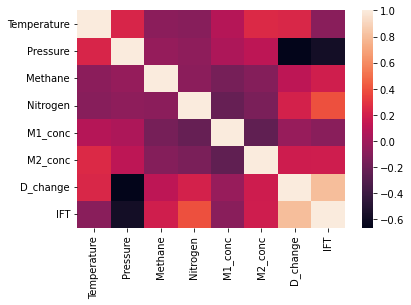

In [3]:
sns.heatmap(df.corr())

# Splitting data and working on features


In [4]:
X= df. drop(['IFT','Phase'],axis=1)

In [5]:
y=df.IFT.astype(float)

In [6]:
from sklearn.preprocessing import OneHotEncoder
One_hot=OneHotEncoder()
categorical=['Salttype']
X_categorical=One_hot.fit_transform(X[categorical])

In [7]:
x_cat=pd.DataFrame(X_categorical.toarray(),columns= One_hot.get_feature_names(categorical))

C:\Users\Paa Kwasi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [8]:
x_cat

,Salttype_CaCl,Salttype_MgCl,Salttype_Na2SO4,Salttype_NaCl,Salttype_NaClCaCl,Salttype_NaClKCl,Salttype_Water
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1761,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1762,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1763,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1764,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
X.index=x_cat.index

In [10]:
X=pd.concat([X,x_cat],axis=1)

In [11]:
X

,Temperature,Pressure,Methane,Nitrogen,M1_conc,M2_conc,Salttype,D_change,Salttype_CaCl,Salttype_MgCl,Salttype_Na2SO4,Salttype_NaCl,Salttype_NaClCaCl,Salttype_NaClKCl,Salttype_Water
0,27.00,5.070,0.0,0.0,0.0,0.045,CaCl,0.88170,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,27.00,6.030,0.0,0.0,0.0,0.045,CaCl,0.82990,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27.00,7.020,0.0,0.0,0.0,0.045,CaCl,0.30280,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27.00,8.270,0.0,0.0,0.0,0.045,CaCl,0.25460,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27.00,11.050,0.0,0.0,0.0,0.045,CaCl,0.19770,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1761,99.95,10.978,0.0,0.0,4.9,0.000,NaClKCl,0.91568,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1762,99.95,11.962,0.0,0.0,4.9,0.000,NaClKCl,0.88873,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1763,99.95,12.974,0.0,0.0,4.9,0.000,NaClKCl,0.85951,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1764,99.95,13.964,0.0,0.0,4.9,0.000,NaClKCl,0.83316,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
X=X.drop(["Salttype"],axis=1)

In [13]:
y.index=X.index

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=5,train_size=1)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [16]:
xgbr = XGBRegressor(
    reg_lambda=1,
    colsample_bytree=0.7268617365720165,
    learning_rate=0.07073171568818319,
    max_depth=7,
    min_child_weight=4,
    n_estimators=565,
    n_jobs=-1,
    subsample= 0.6285676779596696
)

In [17]:
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7268617365720165,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.07073171568818319,
             max_delta_step=0, max_depth=7, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=565, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.6285676779596696,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [18]:
xgbr.score(X_train,y_train)

C:\Users\Paa Kwasi\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


nan

In [19]:
xgbr.score(X_test,y_test)

-11.910223056310254

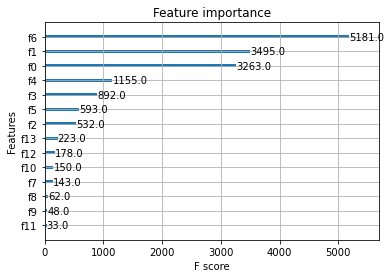

In [41]:
import xgboost as xgb
xgb.plot_importance(xgbr)
plt.show()

In [42]:
importances = xgbr.get_booster().get_score(importance_type='weight')

In [43]:
importances

{'f0': 3263.0,
 'f1': 3495.0,
 'f2': 532.0,
 'f3': 892.0,
 'f4': 1155.0,
 'f5': 593.0,
 'f6': 5181.0,
 'f7': 143.0,
 'f8': 62.0,
 'f9': 48.0,
 'f10': 150.0,
 'f11': 33.0,
 'f12': 178.0,
 'f13': 223.0}

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'reg_lambda': [0.001, 0.01, 0.1, 1.0, 10.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'min_child_weight': [1, 2, 3, 4, 5],
    'n_estimators': [100, 200, 300, 400, 500],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}
xgb_model = XGBRegressor()

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    xgb_model, param_distributions=param_grid, n_iter=50, cv=5, verbose=1, n_jobs=-1
)

# Fit the RandomizedSearchCV to your data
random_search.fit(X_train, y_train)

# Print the best parameters and their corresponding score
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters:  {'subsample': 0.8, 'reg_lambda': 1.0, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
Best Score:  0.9848076351254923


# Checking the Mean squared and absolute errors of the XGBR 

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_abs=mean_absolute_error(y_test,xgbr.predict(X_test))
mean_squared=mean_squared_error(y_test,xgbr.predict(X_test))

mean_abs_t=mean_absolute_error(y_train,xgbr.predict(X_train))
mean_squared_t=mean_squared_error(y_train,xgbr.predict(X_train))

In [45]:
mean_abs, mean_squared, mean_abs_t, mean_squared_t

(0.8330184742189805,
 1.4475096771968017,
 0.21819264621796336,
 0.0867738519123049)

In [46]:
df=pd.DataFrame(y_test) 
df

,IFT
1611,29.52
949,33.50
680,30.50
141,25.00
1620,34.50
...,...
8,27.86
218,56.70
366,43.02
963,62.10


In [47]:
d2=pd.DataFrame(xgbr.predict(X_test), columns=['IFT_pred'])
d2.index=df.index

In [48]:
df=pd.concat([df,d2],axis=1)

In [49]:
df.to_csv("XGBRegressor actual values vs Predicted values without Phase_tuned2!.csv")

In [50]:
df=pd.DataFrame(y_train) 
df

,IFT
1460,58.97
1304,35.89
687,33.80
1540,64.00
447,47.87
...,...
1142,68.52
998,55.10
1725,36.78
206,31.30


In [51]:
d2=pd.DataFrame(xgbr.predict(X_train), columns=['IFT_pred'])
d2.index=df.index

In [52]:
df=pd.concat([df,d2],axis=1)

In [53]:
df.to_csv("XGBRegressor actual values vs Predicted values without Phase_tuned_train2!.csv")

In [54]:
xgbr.save_model("Final_XGB_tuning_2.json")